# Supervised ML Model - zillow Dataset

In [1]:
# import dependencies
# sklearn is the Scikit-learn machine learning library for Python
import pandas as pd
import numpy as np
from datetime import datetime

## Explore the data

In [2]:
file_path = "Resources/cleaned_zillow.csv"
zlw = pd.read_csv(file_path)
zlw.head()

,Unnamed: 0,Address,City,Zipcode,bathrooms,bedrooms,dateSold,daysOnZillow,homeStatus,homeType,...,taxHistory/0/taxPaid,taxHistory/0/time,taxHistory/0/value,taxHistory/0/valueIncreaseRate,url,yearBuilt,zestimate,zestimateHighPercent,zestimateLowPercent,zpid
0,0,2860 NE Blossom Hill Rd,Fairview,97024,3.0,3.0,1.620000e+12,25.0,RECENTLY_SOLD,TOWNHOUSE,...,2989.74,1.590000e+12,172290.0,0.029950,https://www.zillow.com/homedetails/2860-NE-Blo...,2007.0,317406.0,5.0,5.0,72258538
1,1,20386 NE Mackenzie Ln,Fairview,97024,3.0,3.0,1.620000e+12,53.0,RECENTLY_SOLD,SINGLE_FAMILY,...,NaN,NaN,NaN,NaN,https://www.zillow.com/homedetails/20386-NE-Ma...,2001.0,NaN,NaN,NaN,2073593774
2,2,1121 SW 10th Dr,Gresham,97080,3.0,4.0,1.620000e+12,11.0,RECENTLY_SOLD,SINGLE_FAMILY,...,5178.62,1.590000e+12,282340.0,0.029987,https://www.zillow.com/homedetails/1121-SW-10t...,1982.0,512355.0,5.0,5.0,53959026
3,3,19309 NE Glisan St,Portland,97230,1.0,3.0,1.620000e+12,11.0,RECENTLY_SOLD,SINGLE_FAMILY,...,2420.36,1.500000e+12,142330.0,0.029959,https://www.zillow.com/homedetails/19309-NE-Gl...,1953.0,NaN,NaN,NaN,176563865
4,4,25-65 NW 20th St,Gresham,97030,3.0,6.0,1.620000e+12,14.0,RECENTLY_SOLD,APARTMENT,...,2809.61,1.590000e+12,153180.0,0.029989,https://www.zillow.com/homedetails/25-65-NW-20...,1967.0,NaN,NaN,NaN,53819568


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Zipcode'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'dateSold'}>],
       [<AxesSubplot:title={'center':'daysOnZillow'}>,
        <AxesSubplot:title={'center':'lastSoldPrice'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'livingArea'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'lotSize'}>,
        <AxesSubplot:title={'center':'pageViewCount'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'priceHistory/0/price'}>,
        <AxesSubplot:title={'center':'priceHistory/0/priceChangeRate'}>],
       [<AxesSubplot:title={'center':'priceHistory/0/pricePerSquareFoot'}>,
        <AxesSubplot:title={'center':'rentZestimate'}>,
        <AxesSubplot:title={'center':'taxAssessedVa

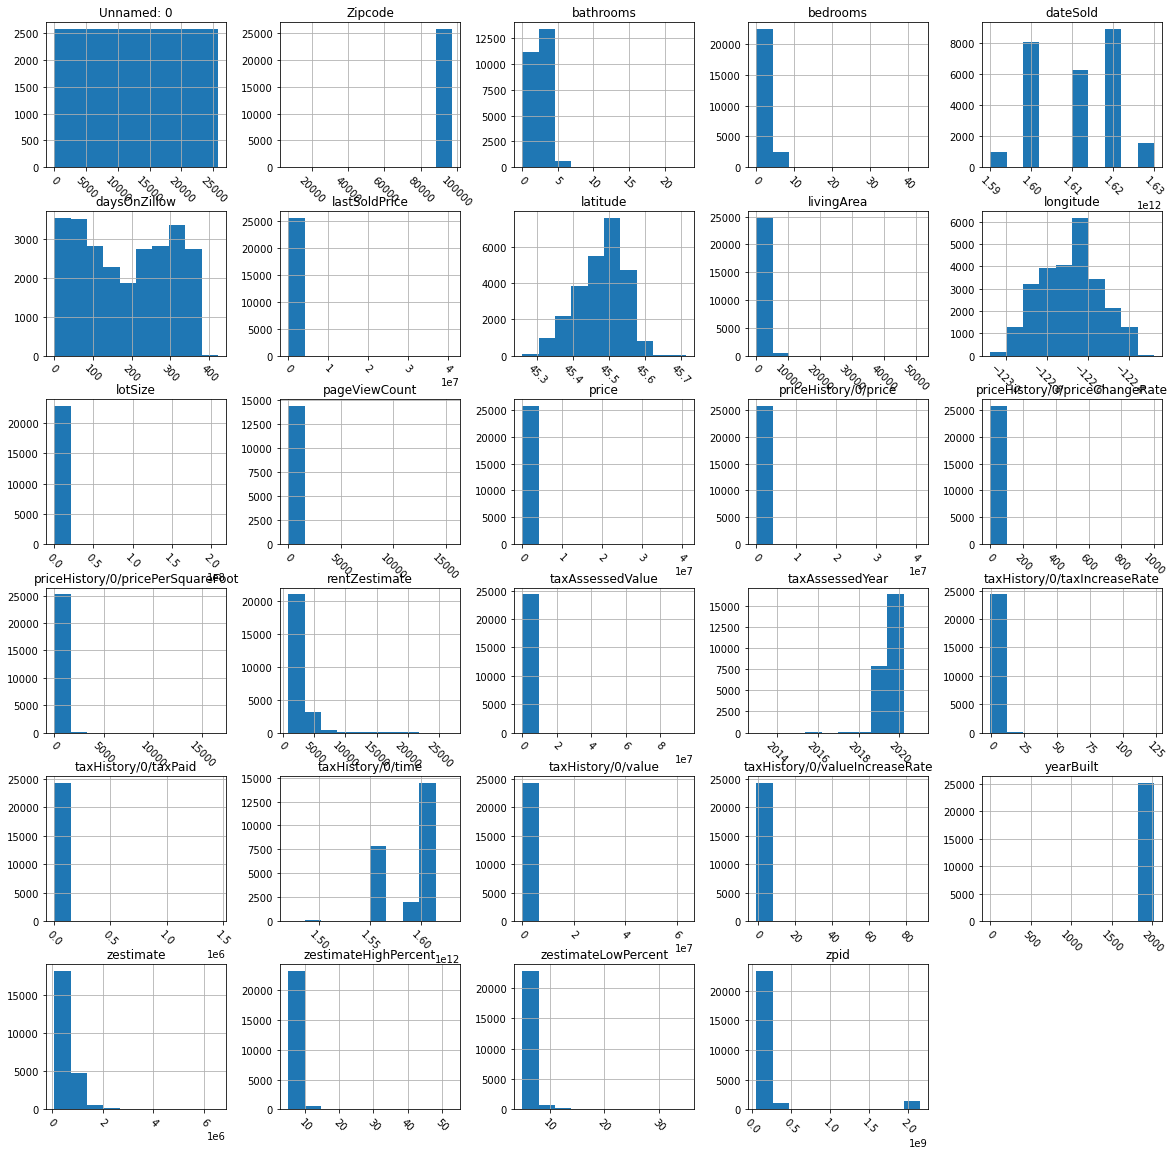

In [3]:
# view the initial, unfiltered dataset
zlw.hist(figsize=(20,20), xrot=-45)

In [4]:
cols = zlw.columns.to_list()
print(cols)

['Unnamed: 0', 'Address', 'City', 'Zipcode', 'bathrooms', 'bedrooms', 'dateSold', 'daysOnZillow', 'homeStatus', 'homeType', 'lastSoldPrice', 'latitude', 'livingArea', 'longitude', 'lotSize', 'pageViewCount', 'price', 'priceHistory/0/date', 'priceHistory/0/event', 'priceHistory/0/postingIsRental', 'priceHistory/0/price', 'priceHistory/0/priceChangeRate', 'priceHistory/0/pricePerSquareFoot', 'rentZestimate', 'resoFacts/atAGlanceFacts/0/factValue', 'resoFacts/basement', 'resoFacts/heating/0', 'resoFacts/atAGlanceFacts/2/factLabel', 'resoFacts/atAGlanceFacts/2/factValue', 'resoFacts/cooling/0', 'resoFacts/atAGlanceFacts/3/factLabel', 'resoFacts/atAGlanceFacts/3/factValue', 'taxAssessedValue', 'taxAssessedYear', 'taxHistory/0/taxIncreaseRate', 'taxHistory/0/taxPaid', 'taxHistory/0/time', 'taxHistory/0/value', 'taxHistory/0/valueIncreaseRate', 'url', 'yearBuilt', 'zestimate', 'zestimateHighPercent', 'zestimateLowPercent', 'zpid']


In [5]:
zlw.describe()

,Unnamed: 0,Zipcode,bathrooms,bedrooms,dateSold,daysOnZillow,lastSoldPrice,latitude,livingArea,longitude,...,taxHistory/0/taxIncreaseRate,taxHistory/0/taxPaid,taxHistory/0/time,taxHistory/0/value,taxHistory/0/valueIncreaseRate,yearBuilt,zestimate,zestimateHighPercent,zestimateLowPercent,zpid
count,25731.000000,25731.000000,25247.000000,24961.000000,2.573100e+04,25725.000000,2.573100e+04,25718.000000,25266.000000,25718.000000,...,24349.000000,2.430500e+04,2.434900e+04,2.432100e+04,24349.000000,25185.000000,2.375700e+04,23756.000000,23756.000000,2.573100e+04
mean,12865.000000,97143.830943,2.561896,3.356356,1.610779e+12,184.738620,5.849993e+05,45.478251,2179.079237,-122.686321,...,0.097695,5.800277e+03,1.585863e+12,2.874945e+05,0.066468,1975.062140,6.441574e+05,5.836715,5.570929,1.859176e+08
std,7428.044224,567.759775,1.009135,1.001626,1.022270e+10,113.431466,4.509202e+05,0.065477,1129.151916,0.144860,...,1.049283,1.026436e+04,1.920015e+10,4.602294e+05,0.828929,54.205158,3.500689e+05,1.739092,1.392246,4.555283e+08
min,0.000000,7123.000000,0.000000,0.000000,1.590000e+12,1.000000,3.000000e+02,45.258659,0.000000,-123.074242,...,-0.890731,1.970000e+00,1.470000e+12,0.000000e+00,-0.892028,0.000000,9.170000e+04,5.000000,5.000000,4.820912e+07
25%,6432.500000,97062.000000,2.000000,3.000000,1.600000e+12,77.000000,3.900000e+05,45.433972,1460.000000,-122.806112,...,0.026827,3.436020e+03,1.560000e+12,1.700700e+05,0.000000,1954.000000,4.495000e+05,5.000000,5.000000,4.858769e+07
50%,12865.000000,97203.000000,3.000000,3.000000,1.610000e+12,185.000000,5.220000e+05,45.488914,1996.000000,-122.674080,...,0.038119,4.646020e+03,1.600000e+12,2.339700e+05,0.029972,1981.000000,5.737000e+05,6.000000,5.000000,5.391049e+07
75%,19297.500000,97221.000000,3.000000,4.000000,1.620000e+12,292.000000,6.620000e+05,45.526379,2670.000000,-122.592539,...,0.041333,6.758490e+03,1.600000e+12,3.323070e+05,0.029996,2003.000000,7.259000e+05,6.000000,6.000000,7.124459e+07
max,25730.000000,97267.000000,23.000000,43.000000,1.630000e+12,422.000000,4.100000e+07,45.713860,51290.000000,-122.280975,...,123.314960,1.457247e+06,1.630000e+12,6.353208e+07,87.252000,2021.000000,6.537500e+06,53.000000,35.000000,2.146987e+09


In [6]:
zlw.dtypes

Unnamed: 0                                int64
Address                                  object
City                                     object
Zipcode                                   int64
bathrooms                               float64
bedrooms                                float64
dateSold                                float64
daysOnZillow                            float64
homeStatus                               object
homeType                                 object
lastSoldPrice                             int64
latitude                                float64
livingArea                              float64
longitude                               float64
lotSize                                 float64
pageViewCount                           float64
price                                     int64
priceHistory/0/date                      object
priceHistory/0/event                     object
priceHistory/0/postingIsRental             bool
priceHistory/0/price                    

#### Check for missing/duplicate/unnecessary data

In [7]:
for col in zlw.columns:
    print(f"Column {col} has {zlw[col].count()} rows.")

Column Unnamed: 0 has 25731 rows.
Column Address has 25731 rows.
Column City has 25731 rows.
Column Zipcode has 25731 rows.
Column bathrooms has 25247 rows.
Column bedrooms has 24961 rows.
Column dateSold has 25731 rows.
Column daysOnZillow has 25725 rows.
Column homeStatus has 25731 rows.
Column homeType has 25731 rows.
Column lastSoldPrice has 25731 rows.
Column latitude has 25718 rows.
Column livingArea has 25266 rows.
Column longitude has 25718 rows.
Column lotSize has 22841 rows.
Column pageViewCount has 14464 rows.
Column price has 25731 rows.
Column priceHistory/0/date has 25731 rows.
Column priceHistory/0/event has 25731 rows.
Column priceHistory/0/postingIsRental has 25731 rows.
Column priceHistory/0/price has 25731 rows.
Column priceHistory/0/priceChangeRate has 25731 rows.
Column priceHistory/0/pricePerSquareFoot has 25217 rows.
Column rentZestimate has 24826 rows.
Column resoFacts/atAGlanceFacts/0/factValue has 25725 rows.
Column resoFacts/basement has 20971 rows.
Column re

In [8]:
# Check for missing data 
# loop through null values
for col in zlw.columns:
    print(f"Column {col} has {zlw[col].isnull().sum()} null values.")

Column Unnamed: 0 has 0 null values.
Column Address has 0 null values.
Column City has 0 null values.
Column Zipcode has 0 null values.
Column bathrooms has 484 null values.
Column bedrooms has 770 null values.
Column dateSold has 0 null values.
Column daysOnZillow has 6 null values.
Column homeStatus has 0 null values.
Column homeType has 0 null values.
Column lastSoldPrice has 0 null values.
Column latitude has 13 null values.
Column livingArea has 465 null values.
Column longitude has 13 null values.
Column lotSize has 2890 null values.
Column pageViewCount has 11267 null values.
Column price has 0 null values.
Column priceHistory/0/date has 0 null values.
Column priceHistory/0/event has 0 null values.
Column priceHistory/0/postingIsRental has 0 null values.
Column priceHistory/0/price has 0 null values.
Column priceHistory/0/priceChangeRate has 0 null values.
Column priceHistory/0/pricePerSquareFoot has 514 null values.
Column rentZestimate has 905 null values.
Column resoFacts/atA

In [9]:
# drop rows with null values
zlw = zlw.dropna()

In [10]:
for col in zlw.columns:
    print(f"Column {col} has {zlw[col].count()} rows.")

Column Unnamed: 0 has 7632 rows.
Column Address has 7632 rows.
Column City has 7632 rows.
Column Zipcode has 7632 rows.
Column bathrooms has 7632 rows.
Column bedrooms has 7632 rows.
Column dateSold has 7632 rows.
Column daysOnZillow has 7632 rows.
Column homeStatus has 7632 rows.
Column homeType has 7632 rows.
Column lastSoldPrice has 7632 rows.
Column latitude has 7632 rows.
Column livingArea has 7632 rows.
Column longitude has 7632 rows.
Column lotSize has 7632 rows.
Column pageViewCount has 7632 rows.
Column price has 7632 rows.
Column priceHistory/0/date has 7632 rows.
Column priceHistory/0/event has 7632 rows.
Column priceHistory/0/postingIsRental has 7632 rows.
Column priceHistory/0/price has 7632 rows.
Column priceHistory/0/priceChangeRate has 7632 rows.
Column priceHistory/0/pricePerSquareFoot has 7632 rows.
Column rentZestimate has 7632 rows.
Column resoFacts/atAGlanceFacts/0/factValue has 7632 rows.
Column resoFacts/basement has 7632 rows.
Column resoFacts/heating/0 has 7632

In [11]:
# check for duplicate data
print(f"There are {zlw.duplicated().sum()} duplicate rows.")

There are 0 duplicate rows.


In [12]:
zlw.dtypes

Unnamed: 0                                int64
Address                                  object
City                                     object
Zipcode                                   int64
bathrooms                               float64
bedrooms                                float64
dateSold                                float64
daysOnZillow                            float64
homeStatus                               object
homeType                                 object
lastSoldPrice                             int64
latitude                                float64
livingArea                              float64
longitude                               float64
lotSize                                 float64
pageViewCount                           float64
price                                     int64
priceHistory/0/date                      object
priceHistory/0/event                     object
priceHistory/0/postingIsRental             bool
priceHistory/0/price                    

## Begin Machine Learning

#### Processing
For data processing, the focus is on making sure the data is set up for the unsupervised learning model, which requires the following:
* Null values are handled.
* Only numerical data is used.
* Values are scaled. In other words, data has been manipulated to ensure that the variance between the numbers won't skew results.

In [15]:
#reference site for ML: https://towardsdatascience.com/predict-house-prices-with-machine-learning-5b475db4e1e

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sb

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics #r2, MAE, MSE, RMSE, ec

import pickle

### Numerical Features

In [17]:
# split into numerical dataset here
zlw_num=zlw.drop(columns=['Unnamed: 0',
                      'Address',
                      'City',
                      #'Zipcode',
                      #'bathrooms',
                      #'bedrooms',
                      'dateSold',
                      #'daysOnZillow',
                      'homeStatus',
                      'homeType',
                      #'lastSoldPrice',
                      #'latitude',
                      #'livingArea',
                      #'longitude',
                      #'lotSize',
                      #'pageViewCount',
                      #'price',
                      'priceHistory/0/date',
                      'priceHistory/0/event',
                      #'priceHistory/0/postingIsRental',
                      #'priceHistory/0/price',
                      #'priceHistory/0/priceChangeRate',
                      #'priceHistory/0/pricePerSquareFoot',
                      #'rentZestimate',
                      'resoFacts/atAGlanceFacts/0/factValue',
                      'resoFacts/basement',
                      'resoFacts/heating/0',
                      'resoFacts/atAGlanceFacts/2/factLabel',
                      'resoFacts/atAGlanceFacts/2/factValue',
                      'resoFacts/cooling/0',
                      'resoFacts/atAGlanceFacts/3/factLabel',
                      'resoFacts/atAGlanceFacts/3/factValue',
                      #'taxAssessedValue', 'taxAssessedYear',
                      #'taxHistory/0/taxIncreaseRate',
                      #'taxHistory/0/taxPaid',
                      #'taxHistory/0/time',
                      #'taxHistory/0/value',
                      #'taxHistory/0/valueIncreaseRate',
                      'url',
                      #'yearBuilt',
                      #'zestimate',
                      #'zestimateHighPercent',
                      #'zestimateLowPercent',
                      #'zpid'
                   ])
zlw_num.dtypes

Zipcode                                int64
bathrooms                            float64
bedrooms                             float64
daysOnZillow                         float64
lastSoldPrice                          int64
latitude                             float64
livingArea                           float64
longitude                            float64
lotSize                              float64
pageViewCount                        float64
price                                  int64
priceHistory/0/postingIsRental          bool
priceHistory/0/price                   int64
priceHistory/0/priceChangeRate       float64
priceHistory/0/pricePerSquareFoot    float64
rentZestimate                        float64
taxAssessedValue                     float64
taxAssessedYear                      float64
taxHistory/0/taxIncreaseRate         float64
taxHistory/0/taxPaid                 float64
taxHistory/0/time                    float64
taxHistory/0/value                   float64
taxHistory

In [18]:
zlw_num.head()

,Zipcode,bathrooms,bedrooms,daysOnZillow,lastSoldPrice,latitude,livingArea,longitude,lotSize,pageViewCount,...,taxHistory/0/taxIncreaseRate,taxHistory/0/taxPaid,taxHistory/0/time,taxHistory/0/value,taxHistory/0/valueIncreaseRate,yearBuilt,zestimate,zestimateHighPercent,zestimateLowPercent,zpid
2,97080,3.0,4.0,11.0,512000,45.488228,2724.0,-122.444420,9583.0,153.0,...,0.026868,5178.62,1.590000e+12,282340.0,0.029987,1982.0,512355.0,5.0,5.0,53959026
6,97030,2.0,3.0,25.0,478200,45.498184,2036.0,-122.451332,6969.0,7.0,...,0.026860,4292.53,1.590000e+12,234030.0,0.029971,1978.0,481241.0,5.0,5.0,53978110
9,97080,3.0,3.0,41.0,550000,45.475353,2209.0,-122.468307,5227.0,35.0,...,0.024983,4356.28,1.590000e+12,258560.0,0.029996,2017.0,557448.0,5.0,5.0,176566127
15,97080,3.0,3.0,53.0,465000,45.482521,1772.0,-122.457100,11324.0,18.0,...,0.026855,4285.92,1.590000e+12,233670.0,0.029973,1974.0,473409.0,5.0,5.0,53825178
22,97030,2.0,3.0,74.0,412000,45.516479,1770.0,-122.443367,7405.0,6.0,...,0.026864,3680.27,1.590000e+12,200650.0,0.029978,1968.0,422819.0,5.0,5.0,53964704


array([[<AxesSubplot:title={'center':'Zipcode'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'daysOnZillow'}>,
        <AxesSubplot:title={'center':'lastSoldPrice'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'livingArea'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'lotSize'}>,
        <AxesSubplot:title={'center':'pageViewCount'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'priceHistory/0/price'}>,
        <AxesSubplot:title={'center':'priceHistory/0/priceChangeRate'}>,
        <AxesSubplot:title={'center':'priceHistory/0/pricePerSquareFoot'}>,
        <AxesSubplot:title={'center':'rentZestimate'}>],
       [<AxesSubplot:title={'center':'taxAssessedValue'}>,
        <AxesSubplot:title={'center':'taxAssessedYear'}>,
        <AxesSubplot:title={'center':'

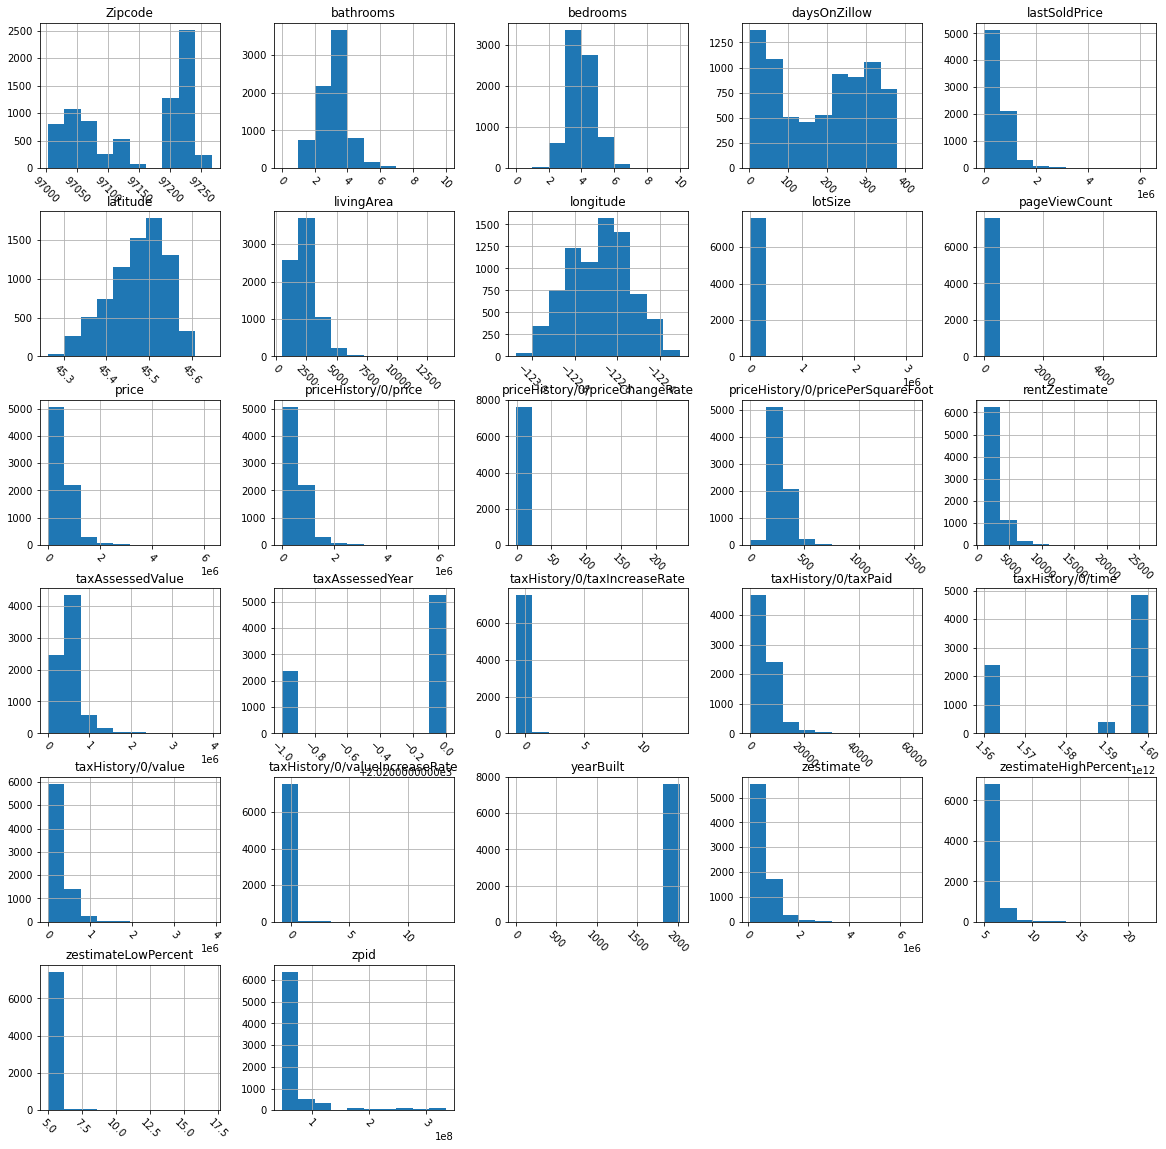

In [19]:
# visualize the data
zlw_num.hist(figsize=(20,20), xrot=-45)

The median house price is $555,000.00.


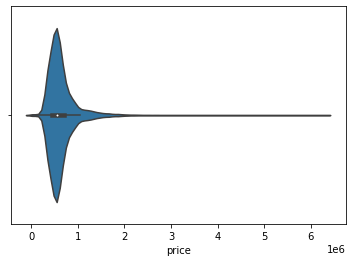

In [20]:
# view distribution of the target variable (price)
sb.violinplot(data=zlw_num, x='price')
print(f"The median house price is ${(zlw_num.price.median()):,.2f}.")

The median lot size is 6969 sqft.
The maximum lot size is 3136320 sqft.
The minimum lot size is 0 sqft.


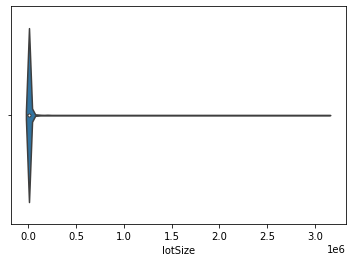

In [21]:
# view distribution of the lot size variable to check for outliers
sb.violinplot(data=zlw_num, x='lotSize')
print(f"The median lot size is {(zlw_num.lotSize.median()):.0f} sqft.")
print(f"The maximum lot size is {(zlw_num.lotSize.max()):.0f} sqft.")
print(f"The minimum lot size is {(zlw_num.lotSize.min()):.0f} sqft.")

<AxesSubplot:>

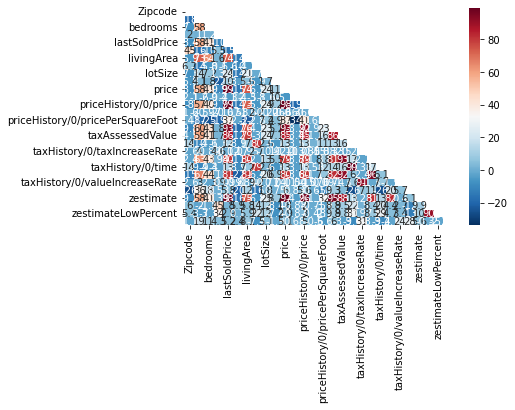

In [22]:
#correlation heatmap
# mask out upper triangle
mask = np.zeros_like(zlw_num.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# heatmap
sb.heatmap(zlw_num.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

### Categorical Features

In [24]:
zlw.dtypes[zlw.dtypes=='object']

Address                                 object
City                                    object
homeStatus                              object
homeType                                object
priceHistory/0/date                     object
priceHistory/0/event                    object
resoFacts/atAGlanceFacts/0/factValue    object
resoFacts/basement                      object
resoFacts/heating/0                     object
resoFacts/atAGlanceFacts/2/factLabel    object
resoFacts/atAGlanceFacts/2/factValue    object
resoFacts/cooling/0                     object
resoFacts/atAGlanceFacts/3/factLabel    object
resoFacts/atAGlanceFacts/3/factValue    object
url                                     object
dtype: object

In [23]:
# split into categorical dataset
zlw_cat=zlw.drop(columns=['Unnamed: 0',
                      'Address',
                      #'City',
                      'Zipcode',
                      'bathrooms',
                      'bedrooms',
                      'dateSold',
                      'daysOnZillow',
                      #'homeStatus',
                      #'homeType',
                      'lastSoldPrice',
                      'latitude',
                      'livingArea',
                      'longitude',
                      'lotSize',
                      'pageViewCount',
                      'price',
                      'priceHistory/0/date',
                      #'priceHistory/0/event',
                      'priceHistory/0/postingIsRental',
                      'priceHistory/0/price',
                      'priceHistory/0/priceChangeRate',
                      'priceHistory/0/pricePerSquareFoot',
                      'rentZestimate',
                      #'resoFacts/atAGlanceFacts/0/factValue',
                      #'resoFacts/basement',
                      #'resoFacts/heating/0',
                      #'resoFacts/atAGlanceFacts/2/factLabel',
                      #'resoFacts/atAGlanceFacts/2/factValue',
                      #'resoFacts/cooling/0',
                      #'resoFacts/atAGlanceFacts/3/factLabel',
                      #'resoFacts/atAGlanceFacts/3/factValue',
                      'taxAssessedValue','taxAssessedYear',
                      'taxHistory/0/taxIncreaseRate',
                      'taxHistory/0/taxPaid',
                      'taxHistory/0/time',
                      'taxHistory/0/value',
                      'taxHistory/0/valueIncreaseRate',
                      'url',
                      'yearBuilt',
                      'zestimate',
                      'zestimateHighPercent',
                      'zestimateLowPercent',
                      'zpid'
                   ])
zlw_cat.head()

,City,homeStatus,homeType,priceHistory/0/date,priceHistory/0/event,resoFacts/atAGlanceFacts/0/factValue,resoFacts/basement,resoFacts/heating/0,resoFacts/atAGlanceFacts/2/factLabel,resoFacts/atAGlanceFacts/2/factValue,resoFacts/cooling/0,resoFacts/atAGlanceFacts/3/factLabel,resoFacts/atAGlanceFacts/3/factValue
2,Gresham,RECENTLY_SOLD,SINGLE_FAMILY,6/4/2021,Sold,Ranch,Daylight,Forced Air,Heating,"Forced Air, Fireplace(s)",Wall Unit(s),Cooling,Wall Unit(s)
6,Gresham,RECENTLY_SOLD,SINGLE_FAMILY,5/21/2021,Sold,SingleFamily,Finished,Heat pump,Heating,Heat pump,Central,Cooling,Central
9,Gresham,RECENTLY_SOLD,SINGLE_FAMILY,5/5/2021,Sold,Single Family Residence,Crawl Space,Forced Air,Heating,"Forced Air, Forced Air - 95+%, Fireplace(s)",Central Air,Cooling,Central Air
15,Gresham,RECENTLY_SOLD,SINGLE_FAMILY,4/23/2021,Sold,SingleFamily,Finished,Forced air,Heating,Forced air,Central,Cooling,Central
22,Gresham,RECENTLY_SOLD,SINGLE_FAMILY,4/2/2021,Sold,Single Family Residence,Crawl Space,Forced Air - 90%,Heating,"Forced Air - 90%, Fireplace(s)",Central Air,Cooling,Central Air


#### Additional Cleaning
We need to clean the categorical features further - merged options (ex SingleFamily and Single Family Residence can be combined as one).

In [30]:
print(zlw.City.value_counts())
print(zlw.homeStatus.value_counts())
print(zlw.homeType.value_counts())
print(zlw['priceHistory/0/event'].value_counts())
print(zlw['resoFacts/atAGlanceFacts/0/factValue'].value_counts())

Portland        3450
Beaverton        675
Hillsboro        550
Lake Oswego      519
Oregon City      457
Gresham          411
Tigard           358
West Linn        301
Happy Valley     260
Milwaukie        161
Aloha            100
King City         67
Sherwood          66
Troutdale         61
Tualatin          61
Fairview          57
Gladstone         36
Wood Village      14
Clackamas         12
Beavercreek        5
Estacada           3
Cornelius          2
Wilsonville        2
Newberg            1
PORTLAND           1
Millwaukie         1
Lake oswego        1
Name: City, dtype: int64
RECENTLY_SOLD    7608
FOR_SALE           16
FOR_RENT            8
Name: homeStatus, dtype: int64
SINGLE_FAMILY    7271
TOWNHOUSE         279
CONDO              82
Name: homeType, dtype: int64
Sold               7527
Listing removed      87
Listed for sale       8
Listed for rent       6
Price change          4
Name: priceHistory/0/event, dtype: int64
Single Family Residence               6472
SingleFamily

Once we complete the further cleaning of categorical data, we can use get_dummies and include categorical columns back into the ML model for evaluation.

Pick up at 1.3 segmentations for further ML momdel development from https://towardsdatascience.com/predict-house-prices-with-machine-learning-5b475db4e1e

In [ ]:
# set the variables
y = zlw["price"]
X = zlw.drop(columns="price", axis=1)

#### Test & Train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=573)
print(X_train.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
print(f'The intercept is: {model.intercept_}')
print(f'The slopes (coefficients for the variables are) are:\n')
coeff_df = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])
coeff_df

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# compare actual vs predicted
regr_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
regr_df

#### Determine Error of the model
https://medium.com/@amanbamrah/how-to-evaluate-the-accuracy-of-regression-results-b38e5512afd3

https://machinelearningmastery.com/regression-metrics-for-machine-learning/

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

* Mean Squared Error (MSE).
* Root Mean Squared Error (RMSE).
* Mean Absolute Error (MAE)

In [ ]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f'The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.\n\nThe mean absolute error for this model is {MAE}.\n')
print(f'The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.\n\nThe mean squared error for this model is is {MSE}.\n')
print(f'The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.\n\nThe root mean squared error for this model is {RMSE}.')

Evaluating regression metrics: https://www.statology.org/how-to-interpret-rmse/

Evaluation of regression metrics are dependent on the dataset. In this case, it is reasonable to assume that an RMSE of 48276 (meaning that predicted price is off by $48,276 on average) results in a relatively accurate model. 

In [ ]:
#Notes: try w & w/o zestimate to see difference